In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('amazon_reviews.csv')

In [3]:
df.sample(5)

,Reviews,label
59,Easy to figure out and used it extensively on ...,spam
178,great device for the price. good looking scree...,ham
308,I enjoy it more then the I-pad that its replac...,ham
179,Great gift for any age. Wish I bought two. I c...,ham
4060,Very good tablet for the money. A lot fast tha...,ham


In [4]:
df.shape

(5002, 2)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  5002 non-null   object
 1   label    5002 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [7]:
# renaming the cols
df.rename(columns={'label':'target','Reviews':'text'},inplace=True)
df.head()

,text,target
0,This product so far has not disappointed. My c...,spam
1,great for beginner or experienced person. Boug...,spam
2,Inexpensive tablet for him to use and learn on...,spam
3,I've had my Fire HD 8 two weeks now and I love...,ham
4,I bought this for my grand daughter when she c...,ham


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,text,target
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,0
4,I bought this for my grand daughter when she c...,0


In [11]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

0

In [13]:
df.shape

(5002, 2)

## 2.EDA

In [14]:
df.head()

,text,target
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,0
4,I bought this for my grand daughter when she c...,0


In [15]:
df['target'].value_counts()

0    3356
1    1646
Name: target, dtype: int64

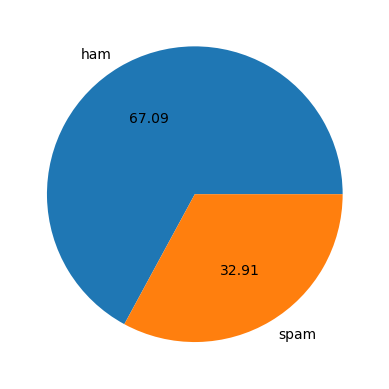

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,text,target,num_characters
0,This product so far has not disappointed. My c...,1,143
1,great for beginner or experienced person. Boug...,1,75
2,Inexpensive tablet for him to use and learn on...,1,131
3,I've had my Fire HD 8 two weeks now and I love...,0,593
4,I bought this for my grand daughter when she c...,0,613


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,text,target,num_characters,num_words
0,This product so far has not disappointed. My c...,1,143,29
1,great for beginner or experienced person. Boug...,1,75,15
2,Inexpensive tablet for him to use and learn on...,1,131,30
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123
4,I bought this for my grand daughter when she c...,0,613,124


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,This product so far has not disappointed. My c...,1,143,29,2
1,great for beginner or experienced person. Boug...,1,75,15,2
2,Inexpensive tablet for him to use and learn on...,1,131,30,2
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4
4,I bought this for my grand daughter when she c...,0,613,124,6


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5002.000000,5002.000000,5002.000000
mean,155.695922,33.774290,2.593363
std,223.035321,47.301689,2.509446
min,3.000000,1.000000,1.000000
25%,66.000000,14.000000,1.000000
50%,99.000000,22.000000,2.000000
75%,175.000000,38.000000,3.000000
max,8351.000000,1775.000000,96.000000


In [26]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3356.000000,3356.000000,3356.000000
mean,153.507151,32.880215,2.552145
std,243.321469,51.243610,2.750633
min,3.000000,1.000000,1.000000
25%,65.000000,14.000000,1.000000
50%,93.000000,20.000000,2.000000
75%,163.000000,35.000000,3.000000
max,8351.000000,1775.000000,96.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1646.000000,1646.000000,1646.00000
mean,160.158566,35.597205,2.67740
std,174.500157,37.968263,1.92436
min,8.000000,2.000000,1.00000
25%,70.250000,16.000000,1.00000
50%,113.000000,26.000000,2.00000
75%,199.750000,43.000000,3.00000
max,3634.000000,808.000000,34.00000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

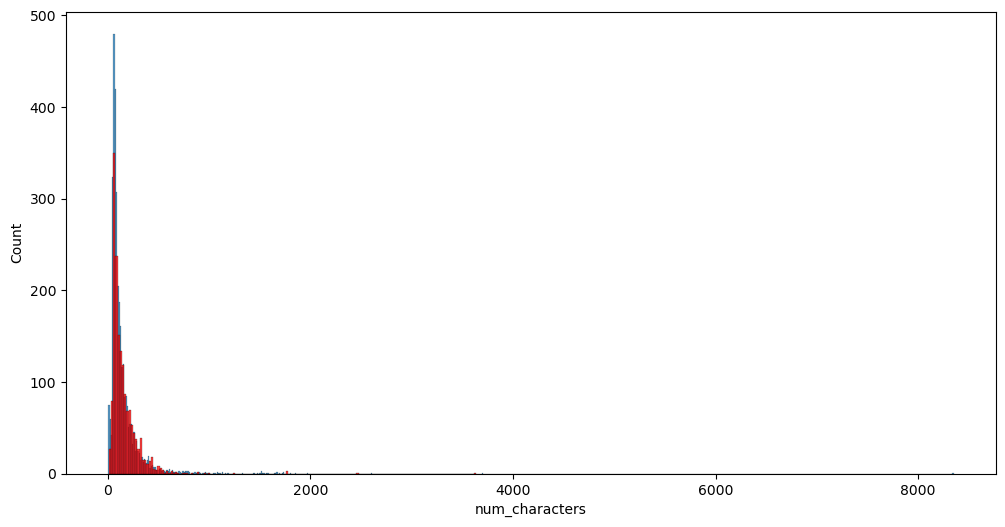

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

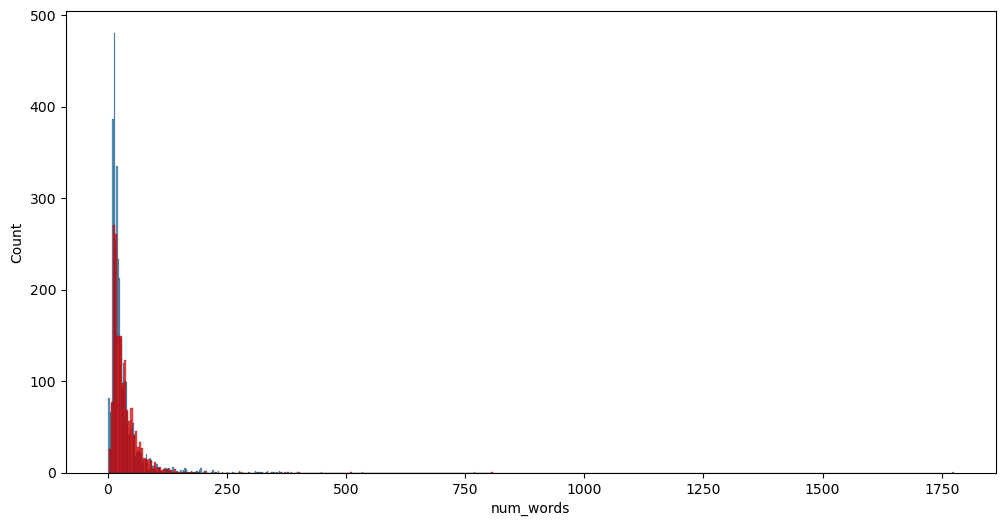

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

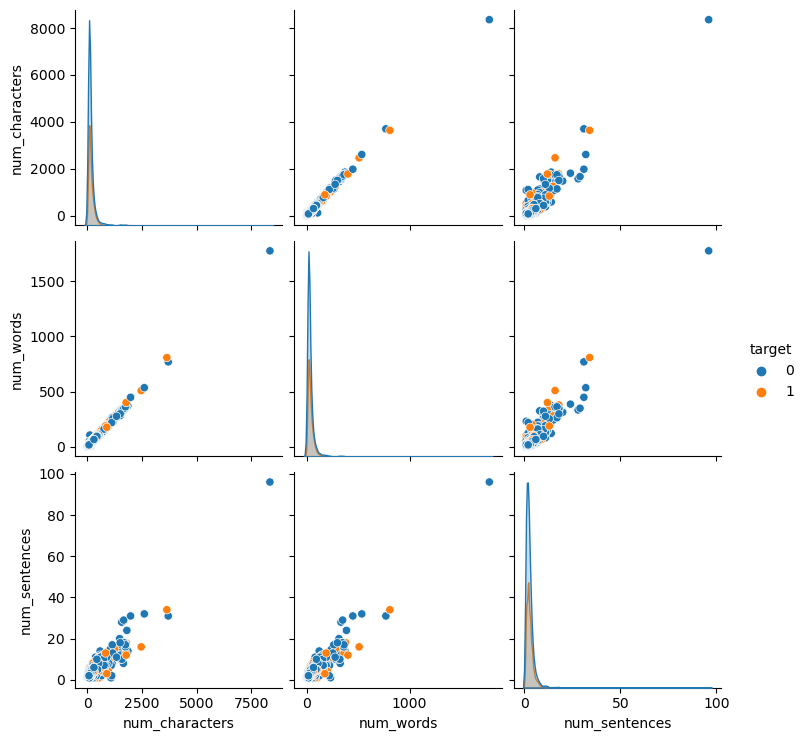

In [31]:
sns.pairplot(df,hue='target')

C:\Users\shivt\AppData\Local\Temp\ipykernel_3876\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

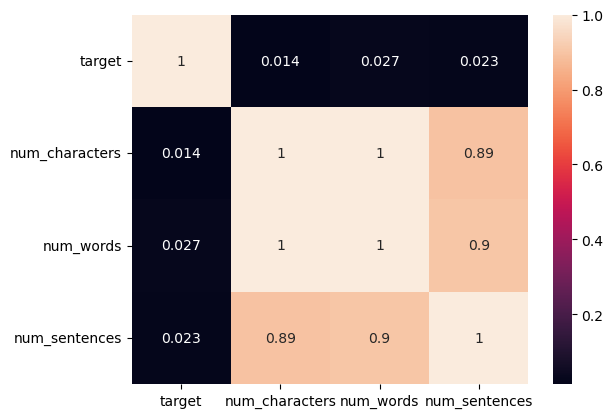

In [32]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [36]:
df['text'][10]

'Not easy for elderly users cease of ads that pop up.'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('crying')

'cri'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,This product so far has not disappointed. My c...,1,143,29,2,product far disappoint children love use like ...
1,great for beginner or experienced person. Boug...,1,75,15,2,great beginn experienc person bought gift love
2,Inexpensive tablet for him to use and learn on...,1,131,30,2,inexpens tablet use learn step nabi thrill lea...
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4,fire hd 8 two week love tablet great prime mem...
4,I bought this for my grand daughter when she c...,0,613,124,6,bought grand daughter come visit set user ente...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

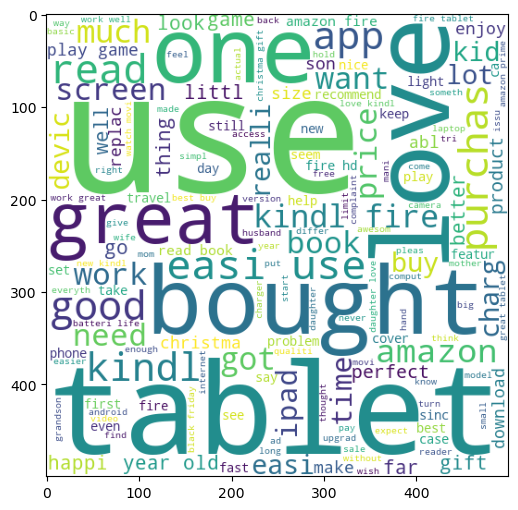

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

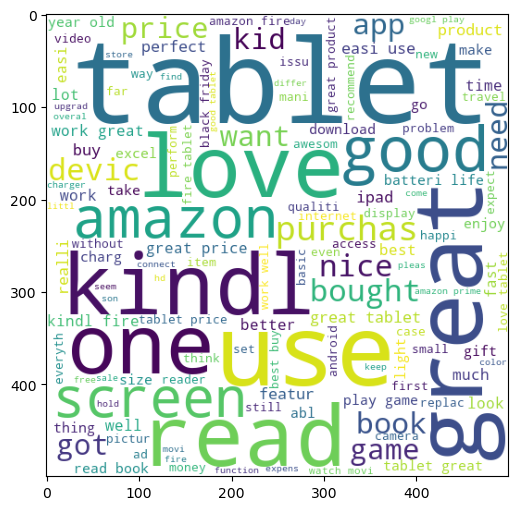

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,This product so far has not disappointed. My c...,1,143,29,2,product far disappoint children love use like ...
1,great for beginner or experienced person. Boug...,1,75,15,2,great beginn experienc person bought gift love
2,Inexpensive tablet for him to use and learn on...,1,131,30,2,inexpens tablet use learn step nabi thrill lea...
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4,fire hd 8 two week love tablet great prime mem...
4,I bought this for my grand daughter when she c...,0,613,124,6,bought grand daughter come visit set user ente...


## 4. Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5002, 3000)

In [49]:
y = df['target'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3996003996003996
[[160 542]
 [ 59 240]]
0.3069053708439898


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7032967032967034
[[688  14]
 [283  16]]
0.5333333333333333


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6983016983016983
[[589 113]
 [189 110]]
0.49327354260089684


In [57]:
# tfidf --> MNB

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [62]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.7402597402597403, 0.5898617511520737)

In [63]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7402597402597403
Precision -  0.5898617511520737
For  NB
Accuracy -  0.7032967032967034
Precision -  0.5333333333333333
For  DT
Accuracy -  0.7072927072927073
Precision -  0.5111111111111111
For  LR
Accuracy -  0.7522477522477522
Precision -  0.6294416243654822
For  RF
Accuracy -  0.7382617382617382
Precision -  0.6528925619834711
For  AdaBoost
Accuracy -  0.7282717282717283
Precision -  0.5537848605577689
For  ETC
Accuracy -  0.7382617382617382
Precision -  0.6330935251798561
For  GBDT
Accuracy -  0.7402597402597403
Precision -  0.6423357664233577
For  xgb
Accuracy -  0.7332667332667333
Precision -  0.5740740740740741


In [64]:
# Random forest is well good in this case

In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [66]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.738262,0.652893
7,GBDT,0.740260,0.642336
6,ETC,0.738262,0.633094
3,LR,0.752248,0.629442
0,SVC,0.740260,0.589862
8,xgb,0.733267,0.574074
5,AdaBoost,0.728272,0.553785
1,NB,0.703297,0.533333
2,DT,0.707293,0.511111


In [67]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [68]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.738262
1,GBDT,Accuracy,0.740260
2,ETC,Accuracy,0.738262
3,LR,Accuracy,0.752248
4,SVC,Accuracy,0.740260
5,xgb,Accuracy,0.733267
6,AdaBoost,Accuracy,0.728272
7,NB,Accuracy,0.703297
8,DT,Accuracy,0.707293
9,RF,Precision,0.652893


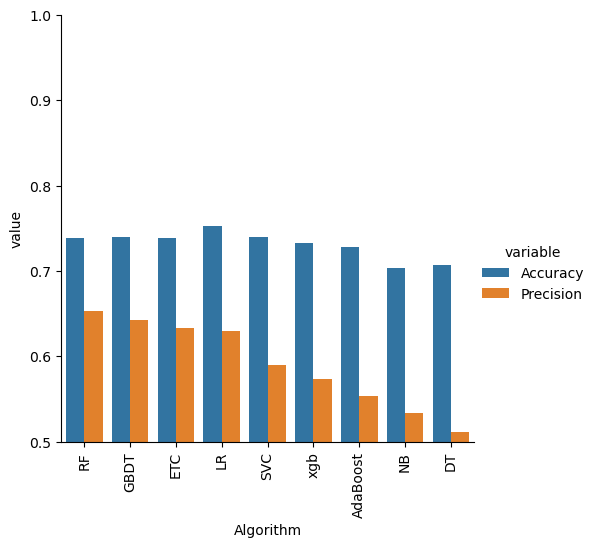

In [69]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [71]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [73]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [74]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [76]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.738262,0.652893,0.738262,0.652893,0.738262,0.652893,0.738262,0.652893
1,GBDT,0.740260,0.642336,0.740260,0.642336,0.740260,0.642336,0.740260,0.642336
2,ETC,0.738262,0.633094,0.738262,0.633094,0.738262,0.633094,0.738262,0.633094
3,LR,0.752248,0.629442,0.752248,0.629442,0.752248,0.629442,0.752248,0.629442
4,SVC,0.740260,0.589862,0.740260,0.589862,0.740260,0.589862,0.740260,0.589862
5,xgb,0.733267,0.574074,0.733267,0.574074,0.733267,0.574074,0.733267,0.574074
6,AdaBoost,0.728272,0.553785,0.728272,0.553785,0.728272,0.553785,0.728272,0.553785
7,NB,0.703297,0.533333,0.703297,0.533333,0.703297,0.533333,0.703297,0.533333
8,DT,0.707293,0.511111,0.707293,0.511111,0.707293,0.511111,0.707293,0.511111


In [77]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [78]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('gbdt', gbdt), ('et', etc)],voting='soft')

In [79]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [80]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.7512487512487512
Precision 0.7016129032258065


In [81]:
# Applying stacking
estimators=[('rfc', rfc), ('gbdt', gbdt), ('et', etc)]
final_estimator=RandomForestClassifier()

In [82]:
from sklearn.ensemble import StackingClassifier

In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [84]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.6883116883116883
Precision 0.47703180212014135


In [99]:
lr = LogisticRegression(solver='liblinear', penalty='l1')

In [100]:
lr.fit(X_train, y_train)
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))